In [61]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon


plt.style.use('default')
plt.rcParams['figure.figsize'] = [8.0,5.0]

df = pd.read_csv('data/train.csv',dtype={'tipodepropiedad':'category','ciudad':'category','provincia':'category'})
df['fecha'] = pd.to_datetime(df['fecha'])
df['anio de publicacion'] = df['fecha'].dt.year
df["mes de publicacion"] = df['fecha'].dt.month
df['preciousd'] = df['precio']/20

In [62]:
def fix_state_names(state_name):
    fix_these = {
        'México': 'Edo. de México',
        'San Luis Potosí': 'San luis Potosí',
        'Baja California': 'Baja California Norte'
    }
    
    return fix_these.get(state_name, state_name)

In [63]:
df['metrostotales'].fillna(df['metroscubiertos'], inplace=True)
df['metroscubiertos'].fillna(df['metrostotales'], inplace=True)

En la siguiente celda esta el filtrado, cambiar lo que se filtra y ver los demas casos

In [64]:
CCC = df[df["centroscomercialescercanos"]==1]

In [65]:
CCC['preciom2usd'] = CCC['preciousd'] / CCC['metrostotales']

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
porcent_of_CCC_por_provincia = CCC.groupby("provincia").agg({"id":"count"})/df.groupby("provincia").agg({"id":"count"})*100
porcent_of_CCC_por_provincia.sort_values(by="id",inplace=True)

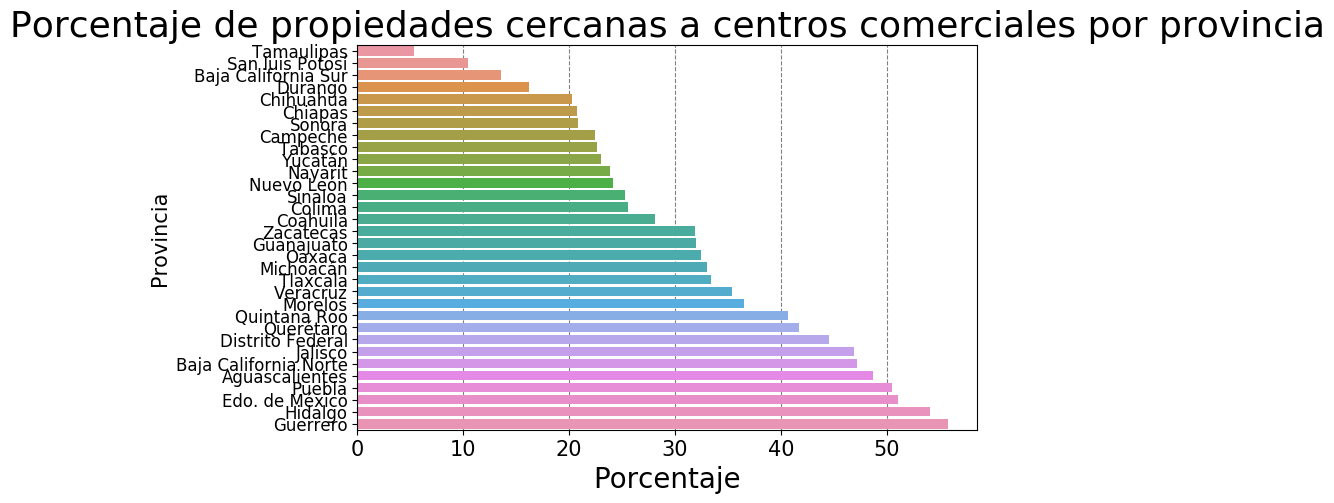

In [67]:
ax = sns.barplot(y=porcent_of_CCC_por_provincia.index, x=porcent_of_CCC_por_provincia.id, data=porcent_of_CCC_por_provincia, order=porcent_of_CCC_por_provincia.index)
ax.set_title('Porcentaje de propiedades cercanas a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Porcentaje', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [68]:
porcent_of_CCC_por_tipo = CCC.groupby("tipodepropiedad").agg({"id":"count"})/df.groupby("tipodepropiedad").agg({"id":"count"})*100
porcent_of_CCC_por_tipo.sort_values(by="id",inplace=True)

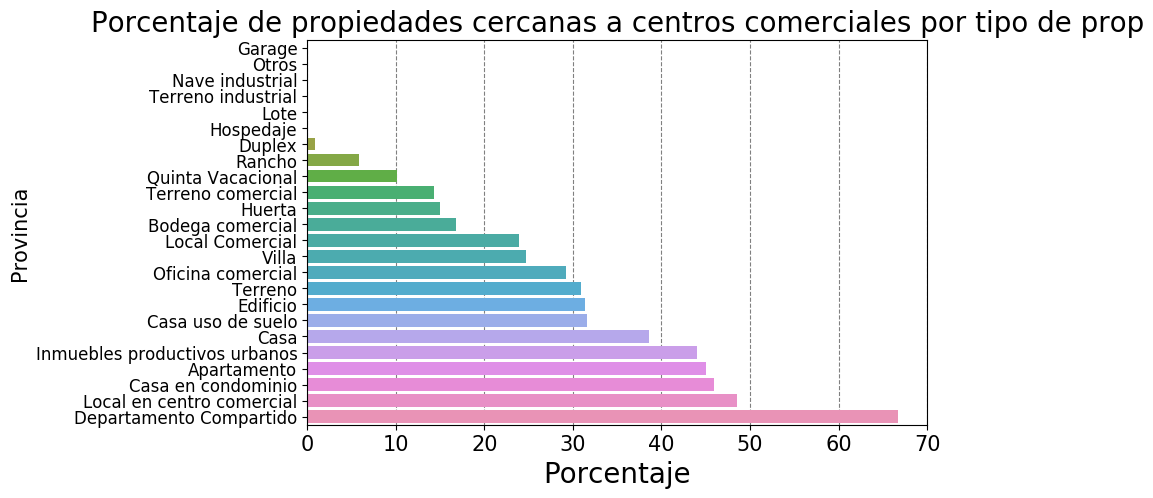

In [69]:
ax = sns.barplot(y=porcent_of_CCC_por_tipo.index, x=porcent_of_CCC_por_tipo.id, data=porcent_of_CCC_por_tipo, order=porcent_of_CCC_por_tipo.index)
ax.set_title('Porcentaje de propiedades cercanas a centros comerciales por tipo de prop', fontsize=20);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Porcentaje', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [70]:
plotear = CCC.tipodepropiedad.value_counts().to_frame()
plotear = plotear.sort_values(by="tipodepropiedad").reset_index()
plotear = plotear.rename(columns={"index":"tipo","tipodepropiedad":"cuenta"})

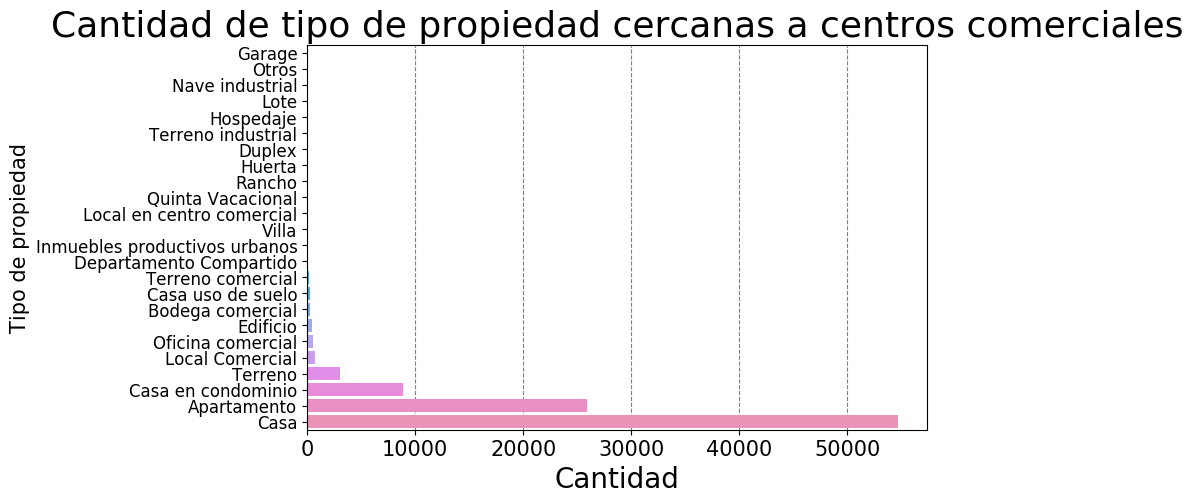

In [71]:
ax = sns.barplot(y=plotear.tipo, x=plotear.cuenta, data=plotear, order=plotear['tipo'])
ax.set_title('Cantidad de tipo de propiedad cercanas a centros comerciales', fontsize=26);
ax.set_ylabel('Tipo de propiedad', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [72]:
plotear = CCC.provincia.value_counts().sort_values()

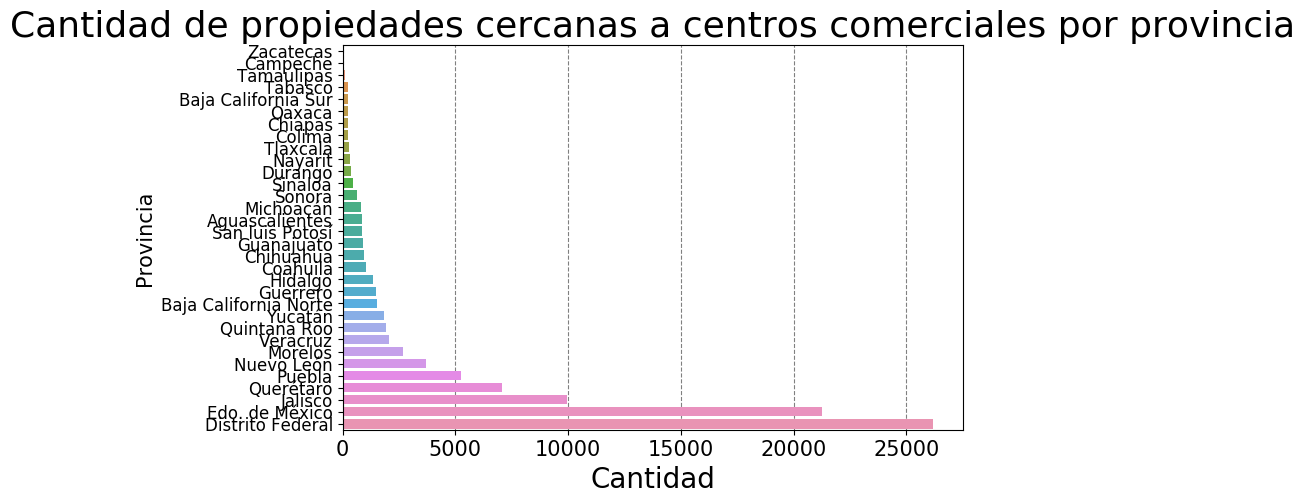

In [73]:
ax = sns.barplot(y=plotear.index, x=plotear.values, order=plotear.index)
ax.set_title('Cantidad de propiedades cercanas a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [74]:
CCC_m2_prov = CCC.groupby("provincia").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd")

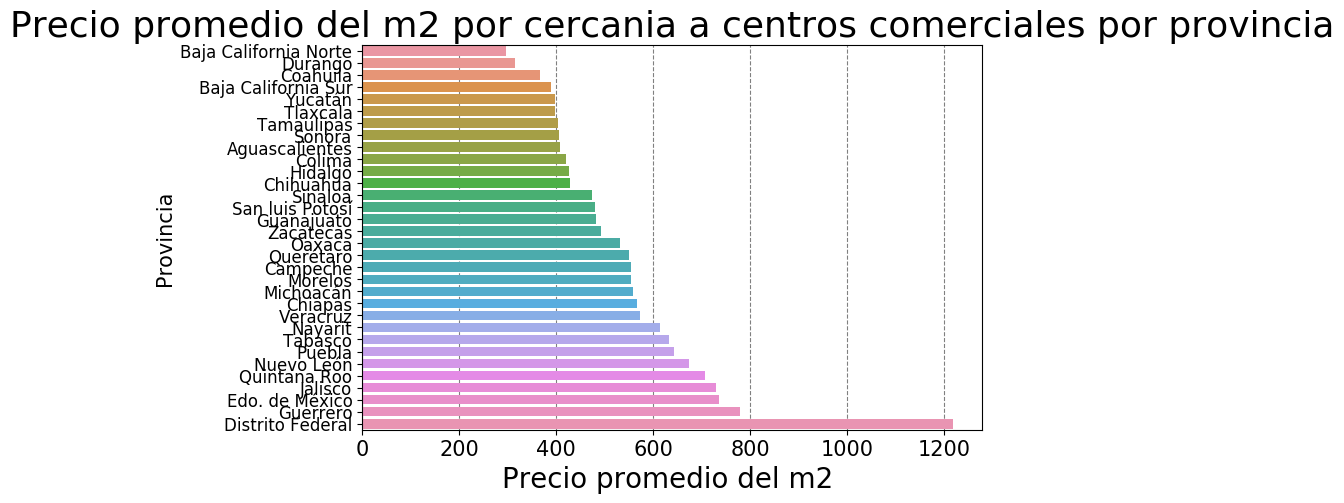

In [75]:
ax = sns.barplot(y=CCC_m2_prov.index, x=CCC_m2_prov.preciom2usd, order=CCC_m2_prov.index)
ax.set_title('Precio promedio del m2 por cercania a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Precio promedio del m2 ', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [76]:
CCC_m2_tipo = CCC.groupby("tipodepropiedad").agg({"preciom2usd":"mean"}).sort_values(by= "preciom2usd").dropna()

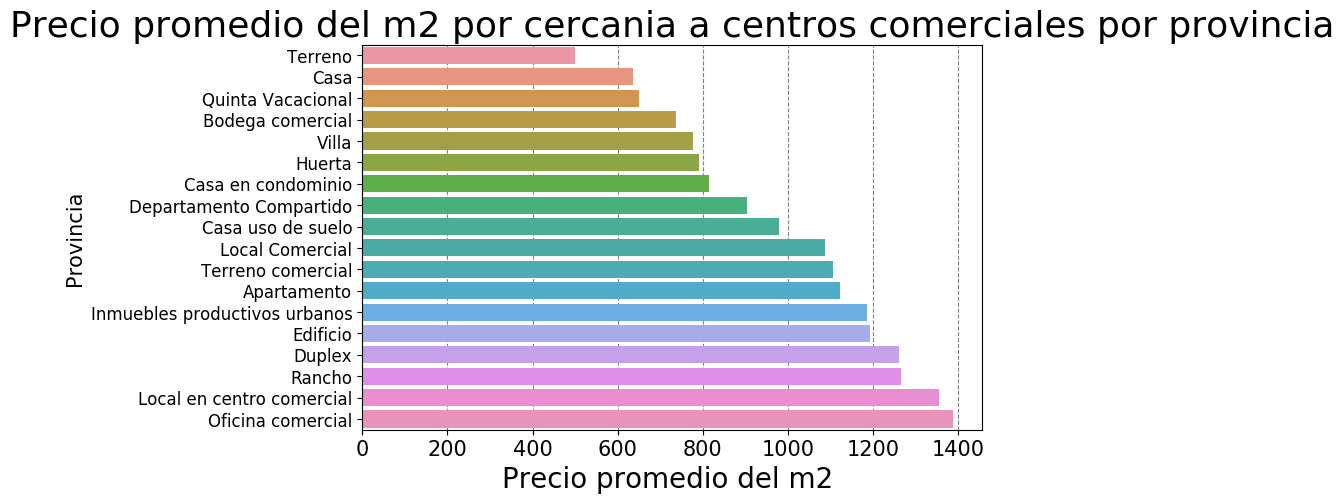

In [77]:
ax = sns.barplot(y=CCC_m2_tipo.index, x=CCC_m2_tipo.preciom2usd, order=CCC_m2_tipo.index)
ax.set_title('Precio promedio del m2 por cercania a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Precio promedio del m2 ', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Text(158.22222222222223, 0.5, 'Año de Publicacion')

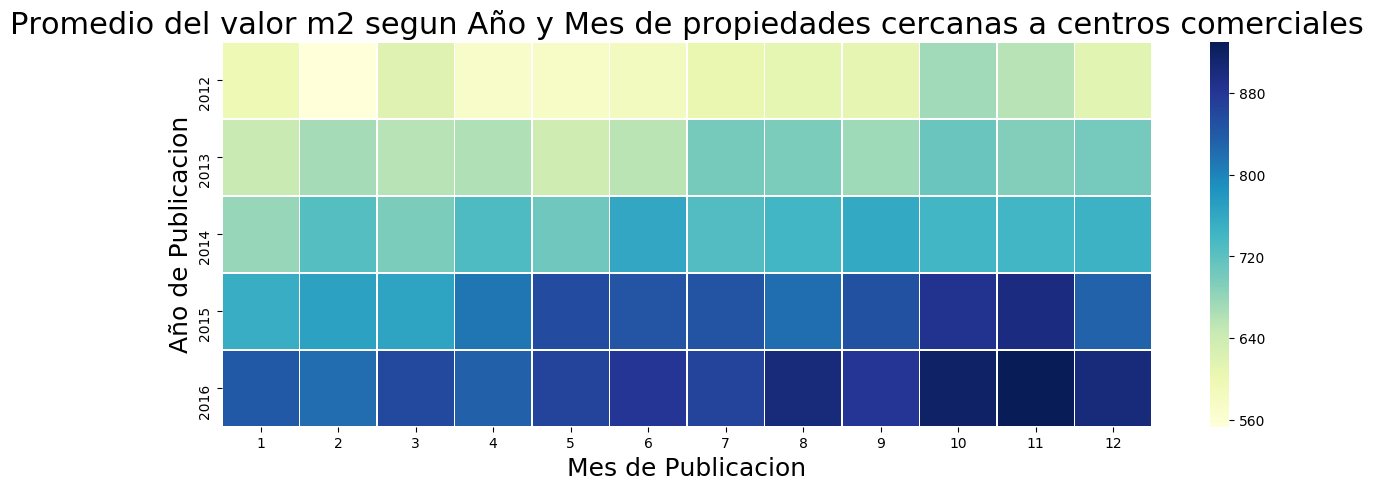

In [78]:
columnas = ["anio de publicacion","mes de publicacion","preciom2usd"]
publicado = CCC[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='preciom2usd', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Promedio del valor m2 segun Año y Mes de propiedades cercanas a centros comerciales", fontsize=22)
g.set_xlabel("Mes de Publicacion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

Text(158.22222222222223, 0.5, 'Año de Publicacion')

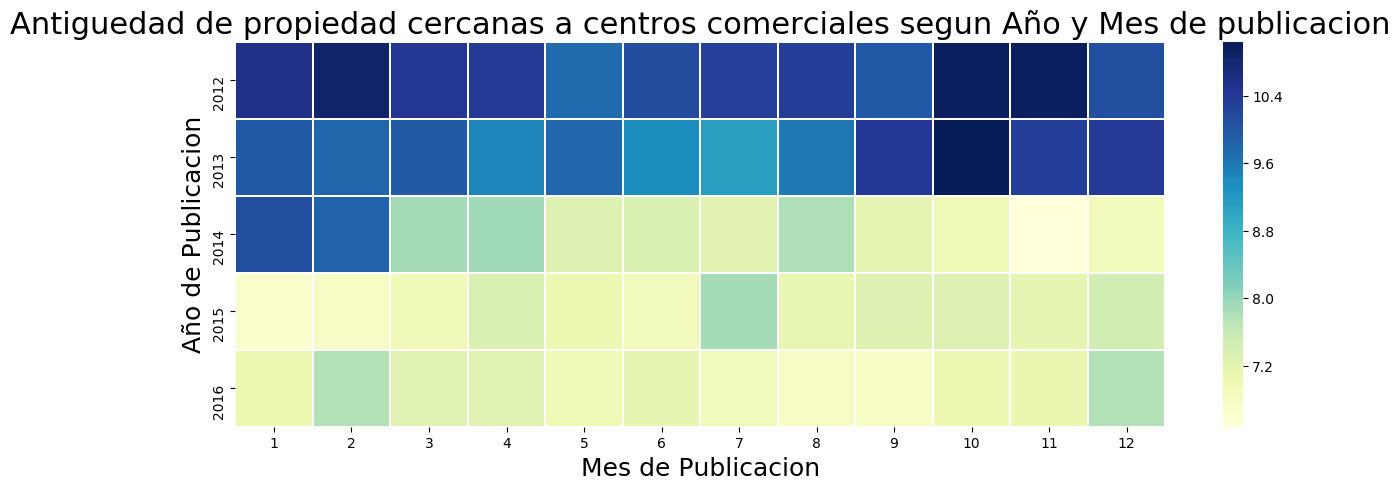

In [79]:
columnas = ["anio de publicacion","mes de publicacion","antiguedad"]
publicado = CCC[columnas]
publicado = publicado.pivot_table(index='anio de publicacion', columns='mes de publicacion', values='antiguedad', aggfunc='mean')
plt.figure(figsize=(15,5))
g = sns.heatmap(publicado,  cmap="YlGnBu", linewidths=.5)
g.set_ylim(5,-0,1)
g.set_title("Antiguedad de propiedad cercanas a centros comerciales segun Año y Mes de publicacion", fontsize=22)
g.set_xlabel("Mes de Publicacion",fontsize=18)
g.set_ylabel("Año de Publicacion", fontsize=18)

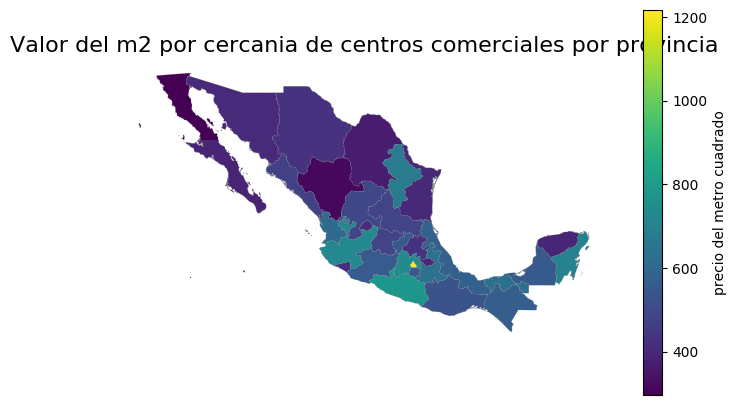

In [80]:
mexico = gpd.read_file('../shapes/MEX_adm1.shp')

mexico['NAME_1'] = mexico['NAME_1'].map(fix_state_names)

CCC_avg_preciom2 = CCC.groupby('provincia').agg({'preciom2usd': 'mean'})\
                        .reset_index().rename(columns={'preciom2usd': 'avg preciom2usd'})\
                        .sort_values('avg preciom2usd', ascending=False)

mexico = pd.merge(left=mexico, right=CCC_avg_preciom2, left_on='NAME_1', right_on='provincia')

vmin = mexico['avg preciom2usd'].min()
vmax = mexico['avg preciom2usd'].max()

fig, ax = plt.subplots()
mexico.plot(ax=ax, column='avg preciom2usd', cmap='viridis', linewidth=0.1, edgecolor='0.5')

ax.set_title('Valor del m2 por cercania de centros comerciales por provincia', fontsize=16)
ax.axis('off')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))

sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label('precio del metro cuadrado');

In [81]:
agrupado = CCC.groupby("provincia").agg({"antiguedad":"mean"}).sort_values(by="antiguedad")

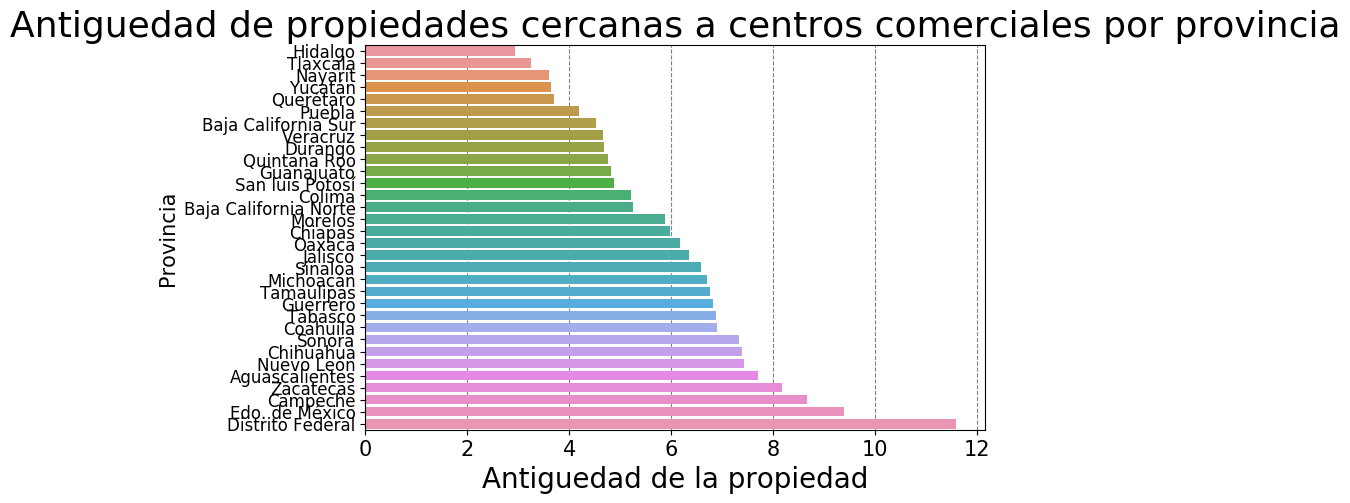

In [82]:
ax = sns.barplot(y=agrupado.index, x=agrupado.antiguedad, order=agrupado.index)
ax.set_title('Antiguedad de propiedades cercanas a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Antiguedad de la propiedad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [83]:
CCC_filter = CCC[CCC["escuelascercanas"]==1]
agrupado_por_escuelas = CCC_filter.groupby("provincia").agg({"escuelascercanas":"count"}).sort_values(by="escuelascercanas")

Se puede ver que Distrito federal es la ciudad con mas escuelas cercanas. Por eso mismo tiene el m2 mas caro tambien ya que es la capital

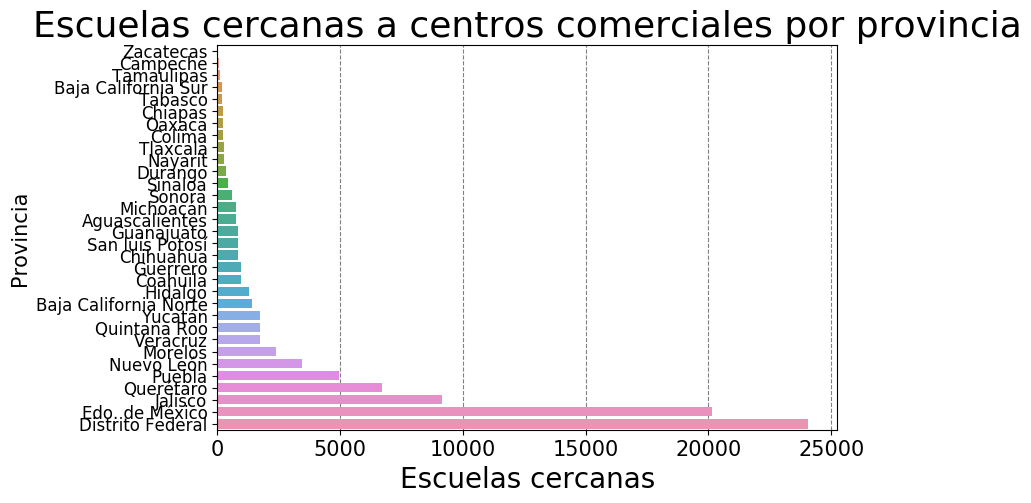

In [84]:
ax = sns.barplot(y=agrupado_por_escuelas.index, x=agrupado_por_escuelas.escuelascercanas, order=agrupado_por_escuelas.index)
ax.set_title('Escuelas cercanas a centros comerciales por provincia', fontsize=26);
ax.set_ylabel('Provincia', fontsize=15)
ax.set_xlabel('Escuelas cercanas', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [85]:
CCC_filter = CCC[~(CCC.provincia.isnull())]
CCC_filter = CCC[~(CCC.ciudad.isnull())]
CCC_filter['ciudad-provincia'] = CCC_filter[['ciudad', 'provincia']].apply(lambda x: ', '.join(x), axis=1)
CCC_agrupado_por_ciudad = CCC_filter.groupby("ciudad-provincia").agg({"id":"count"}).sort_values(by="id",ascending=False).head(15)

/home/peter/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


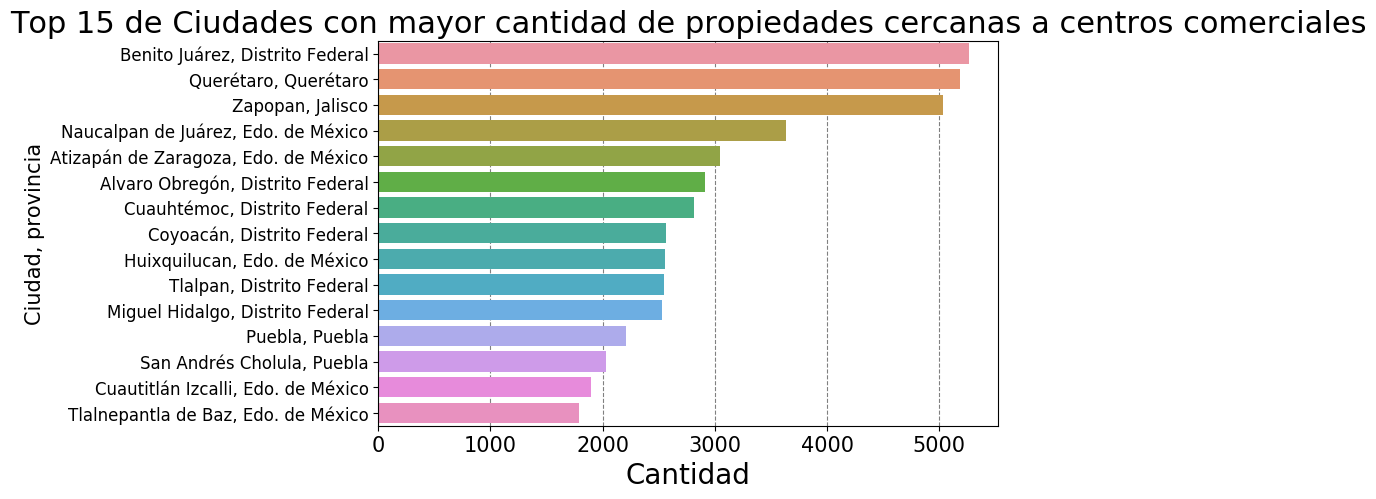

In [86]:
ax = sns.barplot(y=CCC_agrupado_por_ciudad.index, x=CCC_agrupado_por_ciudad.id, order=CCC_agrupado_por_ciudad.index)
ax.set_title('Top 15 de Ciudades con mayor cantidad de propiedades cercanas a centros comerciales', fontsize=22);
ax.set_ylabel('Ciudad, provincia', fontsize=15)
ax.set_xlabel('Cantidad', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

In [87]:
CCC_filter_por_escuela = CCC_filter[CCC_filter["escuelascercanas"]==1]
agrupado_por_escuelas = CCC_filter_por_escuela.groupby("ciudad-provincia").agg({"escuelascercanas":"count"}).sort_values(by="escuelascercanas",ascending=False).head(15)

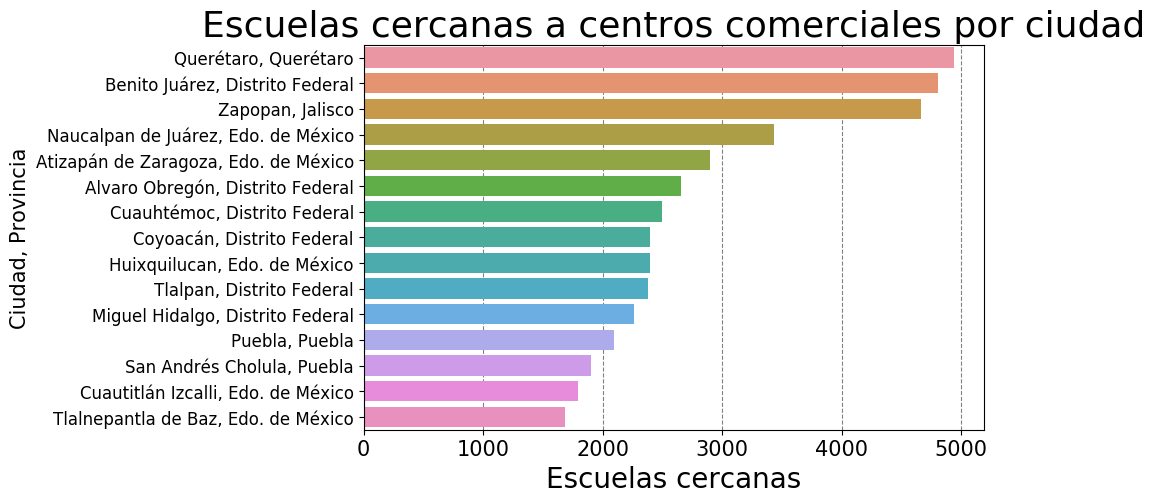

In [88]:
ax = sns.barplot(y=agrupado_por_escuelas.index, x=agrupado_por_escuelas.escuelascercanas, order=agrupado_por_escuelas.index)
ax.set_title('Escuelas cercanas a centros comerciales por ciudad', fontsize=26);
ax.set_ylabel('Ciudad, Provincia', fontsize=15)
ax.set_xlabel('Escuelas cercanas', fontsize=20)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='x', labelsize=15)
ax.yaxis.grid(False)
ax.set_axisbelow(True)
ax.grid(linestyle='dashed', color='gray')
ax.yaxis.grid(False)

Como era de esperarse, cerca de los centros comerciales, hay muchas escuelas. Por el grafico de correlaciones
se puede ver que a medida que crecen los centros comerciales hay mas escuelas cercanas